In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_csv_file(filepath):
    df = pd.read_csv(filepath)
    return df

filepath = 'earning-data.csv'
df = read_csv_file(filepath)
df.describe()


#Conversions and cleanups
df['INJURED'] = df['INJURED'].str.replace(',', '').astype(float)
df['TOTAL_ GROSS'] = df['TOTAL_ GROSS'].str.replace(',', '').astype(float)
df['OVERTIME'] = df['OVERTIME'].str.replace(',', '').astype(float)
df['REGULAR'] = df['REGULAR'].str.replace(',', '').astype(float)

df['OT_to_Regular_Ratio'] = df['OVERTIME'] / df['REGULAR']


#filter department by boston police department
df_police = df[df['DEPARTMENT_NAME'] == 'Boston Police Department']
df_police.head(100)



,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL,OT_to_Regular_Ratio
0,"Gavin,Donna M.",Boston Police Department,Police Lieutenant (Det),53226.90,NaN,"1,045,845.44",463.52,NaN,NaN,"12,812.39",1112348.25,02186,0.008708
3,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),145775.26,NaN,"13,932.92",196515.25,NaN,"11,880.00","29,155.26",397258.69,02052,1.348070
4,"Smith,Sean P",Boston Police Department,Police Lieutenant,142535.62,NaN,"18,827.45",142692.38,NaN,"46,365.00","35,633.88",386054.33,02186,1.001100
5,"McCormick,Kelley J",Boston Police Department,Police Captain,147690.64,NaN,"7,452.73",83593.06,16410.06,"78,060.00","41,025.08",374231.57,02476,0.566001
6,"Long,Gregory P",Boston Police Department,Supn-In Chief,290703.31,NaN,"30,244.46",NaN,NaN,NaN,"52,180.57",373128.34,02021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,"Boyle,Joseph P",Boston Police Department,Police Captain/DDC,164500.82,NaN,"20,806.84",43727.38,NaN,NaN,"41,125.36",270160.40,02186,0.265819
133,"Pratt,Thomas",Boston Police Department,Police Sergeant (Det),132392.79,NaN,"18,872.19",86662.89,NaN,NaN,"31,906.88",269834.75,02127,0.654589
134,"Yalmokas,Kevin J",Boston Police Department,Police Sergeant,130263.05,NaN,"11,969.32",93767.68,NaN,"8,904.00","24,795.84",269699.89,02668,0.719833
135,"Jones,Craig D",Boston Police Department,Police Officer,108038.52,NaN,"10,583.21",144457.87,NaN,"6,302.00",NaN,269381.60,02324,1.337096


In [17]:
#sort police earning data by overtime descending
df_police.sort_values(by=['OVERTIME'], ascending=False).head(100)

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL,OT_to_Regular_Ratio
3,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),145775.26,NaN,"13,932.92",196515.25,NaN,"11,880.00","29,155.26",397258.69,02052,1.348070
14,"Barrett,Thomas E.",Boston Police Department,Police Sergeant (Det),130930.12,NaN,"16,723.95",163494.70,NaN,NaN,"32,732.72",343881.49,02132,1.248717
31,"Downey,Paul J",Boston Police Department,Police Sergeant,136588.74,NaN,"3,187.71",163269.38,NaN,"12,402.00",NaN,315447.83,02132,1.195336
111,"Acosta,Jose L",Boston Police Department,Police Officer,109502.02,NaN,"10,665.06",151608.89,NaN,"5,152.00",NaN,276927.97,01960,1.384531
19,"Johnson,Rick E",Boston Police Department,Police Sergeant (Det),127626.76,NaN,"19,246.67",150658.84,NaN,424.00,"31,906.88",329863.15,02072,1.180464
...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,"Doiron,James M",Boston Police Department,Police Officer,100279.56,NaN,"5,347.91",90522.90,NaN,"6,624.00","10,028.16",212802.53,02359,0.902705
821,"DeLaCruz,Bienvenido",Boston Police Department,Police Officer,104614.25,NaN,800.00,90374.08,NaN,"1,472.00",NaN,197260.33,02170,0.863879
153,"Ciccolo,Steven M",Boston Police Department,Police Lieutenant,142535.62,NaN,850.00,90034.63,NaN,"1,320.00","28,507.02",263247.27,02186,0.631664
681,"Wallace,Sean",Boston Police Department,Police Detective,102319.02,NaN,800.00,90032.99,NaN,"2,024.00","9,661.18",204837.19,02127,0.879924


In [18]:

total_injury_pay = df_police['INJURED'].sum()

In [26]:
percentage_injury_pay = (total_injury_pay / df_police['TOTAL_ GROSS'].sum()) * 100
officers_with_injury_pay = df_police[df_police['INJURED'] > 0].shape[0]

# Calculate the percentage of officers who took injury pay
percentage_officers_injury_pay = (officers_with_injury_pay / df_police.shape[0]) * 100

# Print the result
print(f"Percentage of BPD Officers Who Took Injury Pay: {percentage_officers_injury_pay:.2f}%")

print(f"Total Injury Pay for BPD Officers: ${total_injury_pay:,.2f}")
print(f"Percentage of Total Gross Pay from Injury Pay: {percentage_injury_pay:.2f}%")


Percentage of BPD Officers Who Took Injury Pay: 15.07%
Total Injury Pay for BPD Officers: $23,628,467.04
Percentage of Total Gross Pay from Injury Pay: 5.82%


Percentage of BPD Officers Who Took Overtime Pay: 79.77%
                    NAME    REGULAR   OVERTIME  OT_to_Regular_Ratio
20438   Stewart,Greta E.    1977.92    4785.93             2.419678
11518  Woodley,Lorenzo I   11775.11   21638.24             1.837625
1846     Webster,Geneese   65294.61   93654.82             1.434342
111        Acosta,Jose L  109502.02  151608.89             1.384531
3       Demesmin,Stanley  145775.26  196515.25             1.348070
135        Jones,Craig D  108038.52  144457.87             1.337096
203    Christie,Albert C  109502.02  141222.99             1.289684
14     Barrett,Thomas E.  130930.12  163494.70             1.248717
387    Cornelius,Devon M   92637.86  112645.22             1.215974
260     Shikoluk,Michael   99922.46  121258.11             1.213522


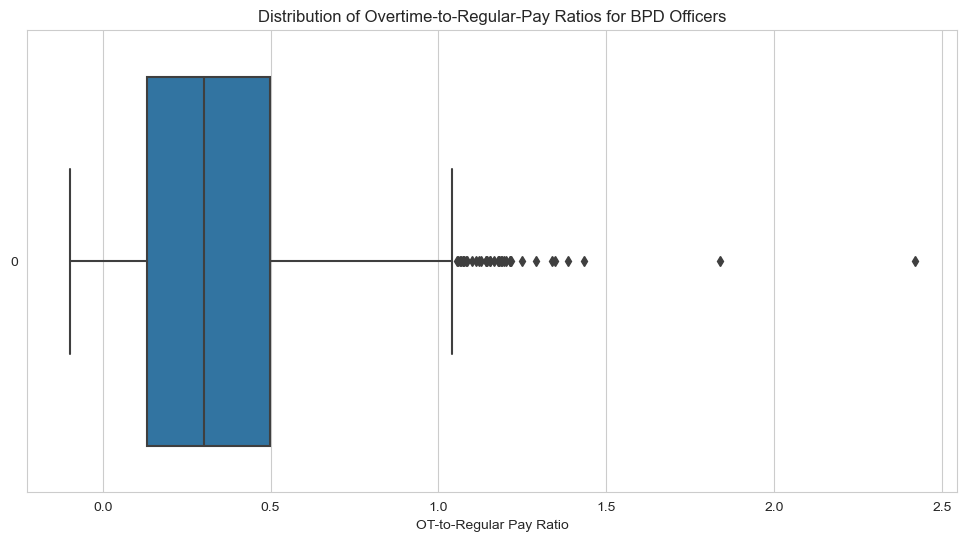

In [28]:
officers_with_overtime_pay = df_police[df_police['OVERTIME'] > 0].shape[0]

# Calculate the percentage of officers who took overtime pay
percentage_officers_overtime_pay = (officers_with_overtime_pay / df_police.shape[0]) * 100

# Print the result
print(f"Percentage of BPD Officers Who Took Overtime Pay: {percentage_officers_overtime_pay:.2f}%")

top_ot_ratio_officers = df_police.sort_values(by='OT_to_Regular_Ratio', ascending=False).head(10)
print(top_ot_ratio_officers[['NAME', 'REGULAR', 'OVERTIME', 'OT_to_Regular_Ratio']])

# Set the style for the plot
sns.set_style("whitegrid")

# Plot the distribution of the overtime-to-regular-pay ratios
plt.figure(figsize=(12, 6))
sns.boxplot(df_police['OT_to_Regular_Ratio'], orient='h')
plt.title('Distribution of Overtime-to-Regular-Pay Ratios for BPD Officers')
plt.xlabel('OT-to-Regular Pay Ratio')
plt.show()